# K-Means
#### K-Means adalah algoritma untuk pengelompokkan. Algoritma ini membagun kelompok dari data yang kita berikan. Kelompok yang dibangun, umumnya menghasilkan kelompok dengan hubungan kedekatan pada masing-masing data.

Bayangkan, anda adalah seorang pekerja pada bagian administrasi di sekolah XYZ. Anda tahu adanya banyak murid di sekolah tersebut dengan latar belakang berbeda. Untuk memenuhi kebutuhan administrasi sekolah, anda ditugaskan untuk menilai jarak tempuh murid ke sekolah di ruang kelas A. Andapun mulai mengelompokkan dan anda memperoleh hasil sebagai berikut:
1. Ada 25 murid yang tinggal dengan jarak kurang dari 1 km (terhitung dari jarak sekolah ke rumah).
2. Ada 4 murid yang tinggal dengan jarak lebih dari 1 km tetapi kurang dari 2 km (terhitung dari jarak sekolah ke rumah).
3. Ada 10 murid yang tinggal dengan jarak lebih 2 km (terhitung dari jarak sekolah ke rumah).

Anda berhasil mengelompokkan murid tersebut kedalam 3 kategori yaitu:
1. Jarak < 1 km
2. 1 km > jarak < 2 km
3. Jarak > 2 km

Kelompok inilah yang disebut dengan clustering.

Proses clustering adalah proses kita mengelompokkan berdasarkan data-data yang telah diperoleh. Pada ruangan kelas kita dapat mengelompokkan murid berdasarkan jenis kelamin (perempuan atau laki-laki), berat badan (di atas 50 kg atau di bawah 50kg), mata (menggunakan kacamata atau tidak menggunakan kacamata), dan masih banyak lagi.

Tetapi pernahkah anda berpikir butuh berapa lama untuk mengelompokkan data yang apabila datanya sangat banyak seperti syarat penerimaan beasiswa (yang harus memenuhi point A, B, C, D, E untuk siswa tersebut memperoleh beasiswa) ataupun data lainnya.

Algoritma K-means memberikan solusi atas permasalahan tersebut. Algoritma ini menggunakan rumus matematika Euclidean Distance untuk menentukan kelompok yang menurut perhitungan tersebut terdekat.Adapun langkah-langkah tahapan clustering dengan K-Means adalah sebagai berikut!

##### Rumus KMeans yang digunakan adalah rumus euclidean distance

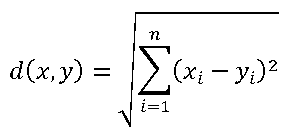

##### contoh perhitungannya adalah sebagai berikut

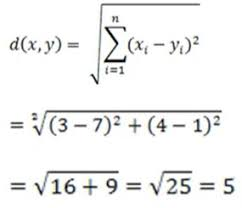

# 1. Penggunaan Data

In [1]:
# library pandas untuk menampilkan data dan mengelolah data dalam bentuk tabel
import pandas as pd
# library matplotlib.pylot digunakan untuk membuat gambar grafik
import matplotlib.pyplot as plt
# library sklearn.cluster adalah library untuk melakukan cluster
import sklearn.cluster as cls


try:
    df1 = pd.read_csv('Penerbangan.csv', sep=";")
    print("Pembacaan data berhasil")
except FileNotFoundError:
    print("Pembacaan file gagal")
print("Data penerbangan adalah:")
display(df1)

Pembacaan data berhasil
Data penerbangan adalah:


,Id',Jarak,Waktu
0,1,1400,125
1,2,1950,130
2,3,1550,154
3,4,1860,157
4,5,1200,100
5,6,2000,120
6,7,3000,265
7,8,3500,272
8,9,2900,263
9,10,2800,120


In [2]:
import os
# Atur variabel threads
os.environ["OMP_NUM_THREADS"] = "1"

##### Pada algorima ini, ketika kita menggunakan library sklearn.cluster, ada kemungkinan terjadinya kebocoran memori. 
kebocoran memori terjadi karena memori pada komputer anda dialokasikan terlalu banyak untuk proses yang dilakukan pada library tersebut. 
Normalnya sebuah program akan menggunakan memori anda ketika berjalan dan memori anda akan dikembalikan ketika program telah selesai berjalan. Tetapi di beberapa kondisi, seiring berjalannya program, terkadang memakan memori yang besar. Hal ini dapat menyebabkan perangkat yang anda gunakan semakin lambat ataupun ketika lebih lama, program dapat mengalami crash.

Adapun permasalahan yang terjadi pada kasus ini:
1. Library sklearn, menggunakan algoritma MKL (Math Kernel Library) pada windows berarti menggunakan memori
2. Kerja algoritma MKL dengan memecah data menjadi beberapa bagian kemudian diproses secara bersamaan.
3. Terkadang dalam proses ini dibutuhkan memori, dan alokasi memori yang tidak baik menyebabkan memori bocor sehingga terkadang muncul eror.

Untuk mengatasi hal tersebut, anda dapat menggunakan library os dan kemudian mengatur threads. Thread ini memungkinkan program untuk menjalankan beberapa tugas secara bersamaan, sehingga kita atur THREADS menjadi "1".

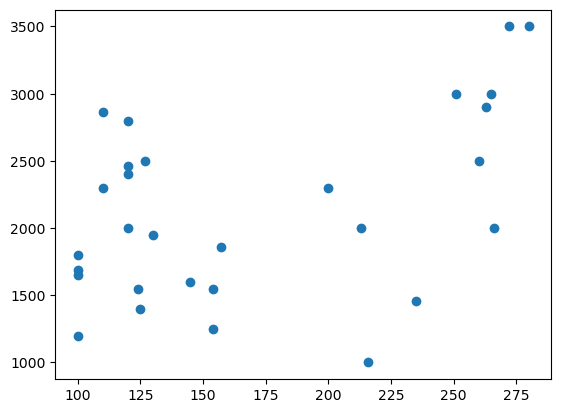

In [3]:
# Berikut adalah pembuatan gambaran data yang dibuat dalam bentuk koordinat (X dan Y)

# Ubah data Waktu menjadi koordinat X dan data Jarak menjadi koordiinat Y.
X = df1["Waktu"]
Y = df1["Jarak"]

# cetak grafik dalam bentuk (X,Y) dengan plt.scatter
plt.scatter(X, Y)
plt.show()

# 2. Melakukan algoritma Clustering K-Means

In [4]:
# data ID tidak akan kita gunakan dalam proses clustering. Data yang dibutuhkan hanya data "Waktu" dan "Jarak". Kita membuat df2 untuk menampung data Waktu dan Jarak
df2 = df1[['Waktu', 'Jarak']]

# buat rumus KMeans dengan library sklearn.cluster yang telah kita inisialisasi sendengan cls. sehingga kita membuat cls.KMeans
# kita perlu menentukan berapa titik centroid. Untuk pendahuluan karena kita belum tahu berapa titik yang optimum, kita dapat menggunkan 2. Sehingga kita membuat cls.KMeans(n_cluster=2)
# tampung rumus yang telah kita buat kedalam variabel "proseskmeans". sehingga rumus yang jadi adalah sebagai berikut:
proseskmeans = cls.KMeans(n_clusters=2)

In [5]:
# Ini adalah hasil parameter dari proseskmeans sebelumnya
print(proseskmeans.get_params())

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [6]:
# anggaplah sekarang variabel "proseskmeans" telah pintar dalam hal kmeans dengan titik centroid 2.
# selanjutnya kita gunakan "proseskmeans" tersebut untuk melatih data yang telah kita siapkan (df2) sebelumnya dengan menggunakan fit. Sehingga proses pelatihan adalah sebagai berikut.
proseskmeans.fit(df2)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

###### Sebelum lebih lanjut, pernahkah kamu berpikir berapa banyak iterasi(perulangan) pada kmeans ini dilakukan hingga mencapai konvergensi saat melatih model?  

In [7]:
# Kita dapat mengetahui berapa iterasi yang dilakukan dengan menggunakan "n_iter_" sebagai berikut
iterasi = proseskmeans.n_iter_
print(f"Jumlah iterasi yang diperlukan untuk mencapai konvergensi: {iterasi}")

Jumlah iterasi yang diperlukan untuk mencapai konvergensi: 5


###### Lanjutkan, sekarang kamu perlu mengetahui titik centroidnya!

In [8]:
# proses sebelumnya kita telah melatih data df2 dengan algoritma kmeans yang telah kita tampung di "proseskmeans". 
# Untuk melihat setiap titik cluster anda dapat menggunakan ".cluster_centers_". Adapun hasil adalah sebagai berikut:
centroids = proseskmeans.cluster_centers_
print(centroids)

[[ 192.15384615 2770.76923077]
 [ 152.4375     1622.5       ]]


###### Dari data tersebut dapat diketahui:
1. Titik pertama berada pada koordinat x,y(152.4375 , 1622.5) 
2. Titik kedua berada pada koordinat x,y(192.15384615 , 2770.76923077) 

In [9]:
# kita dapat membaca titik X dan Y pada koordinat tersebut, tetapi python mungkin kesulitan membacanya. Sehingga kita harus membantu dengan memisahkan antara X dan Y.
# kita memberi tahu python bahwa X berada pada indeks 0 (ditampung dalam variabel "centroid_X") dan Y berada poda indeks 1 (ditampung dalam variabel "centroid_Y") dari array "centroids" sebelumnya.
centroid_X = centroids[:,0]
centroid_Y = centroids[:,1]

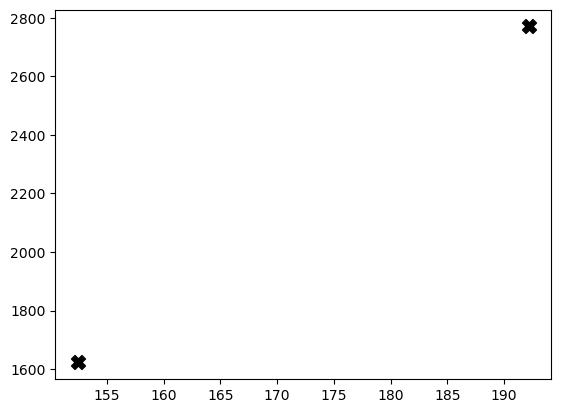

In [10]:
# kita lihat titik koordinat yang telah dibuat oleh python dengan scatter
plt.scatter(centroid_X, centroid_Y, color="black", marker="X", s=100)
plt.show()

##### Kamu telah memperoleh 2 titik centroid dari algoritma yang kita lakukan. Namun, kamu belum tahu data-data yang kamu buat sebelumnya berada di titik yang pertama atau titik yang kedua. Pada dasarnya, proses tersebut telah anda dilakukan pada metode proseskmeans.fit(df2) sebelumnya, tetapi anda belum tahu bagaimana cara untuk mengetahui centroid pada setiap data (data 1 hingga data 29). Mari, kita cari tahu data 1 hingga data 29 berada di titik pertama atau titik kedua.

# 3. Hasil clustering K-Means

In [11]:
# Anda dapat membuat variabel "label" untuk menampung centroid dari setiap data. 
# dengan proseskmeans yang telah anda buat, tambahkan ".labels_" untuk melihat data 1 hingga data 9 berada di titik 0 atau 1
label = proseskmeans.labels_ 
print(label)

[1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1]


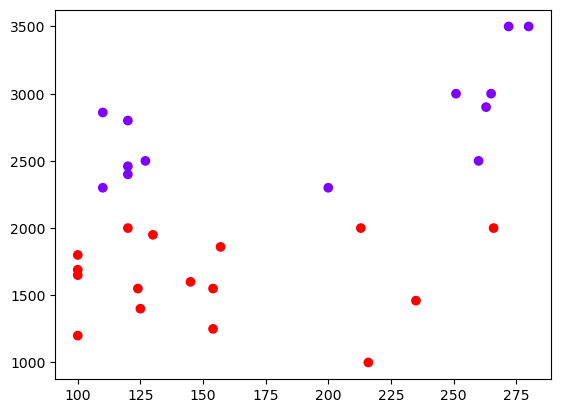

In [12]:
# Anda dapat melihat data lebih jelas menggunakan grafik
plt.scatter(X, Y, c=label, cmap="rainbow")
plt.show()

###### Kamu berhasil membuat titik cluster dengan k=2. Tetapi apakah anda tahu harus berapa titik cluster yang kamu buat agar kamu dapat mencapai hasil yang optimum?

# 4. Menentukan titik cluster yang dianjurkan

In [13]:
# untuk menentukan berapa hasil ketika k=2 
proseskmeans.inertia_

3545317.9375

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

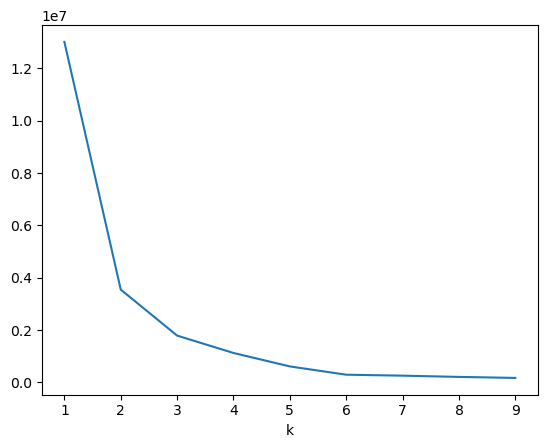

In [14]:
# kita dapat menggunakan intertia untuk mengukur setiap titik cluster kemudian kita simpan hasilnya kedalam array jarak_total=[]
# ketika dihitung hasil inertia maka hasil tersebut akan disimpan kedalam array jarak_total, kita dapat melihat melalui grafik yang dihasilkan
jarak_total = []
K = range(1,10)
for k in K:
    kMeans = cls.KMeans(n_clusters=k)
    kMeans.fit(df2)
    jarak_total.append(kMeans.inertia_)
plt.plot(K, jarak_total)
plt.xlabel('k')
plt.show()

###### Dapat dilihat bahwa hasil grafik yang melandai pada 3-6. Dari grafik ini dapat kita ketahui bahwa titik cluster yang optimum adalah 4 hingga 5. Mari kita coba ganti titik cluster yang awalnya 2 menjadi 4. Kita lihat bagaimana hasilnya.

# Mencoba algoritma dengan titik cluster adalah 4

##### Seperti proses no 2, kita melatih kembali "proseskmeans" tetapi dengan cluster 4.

In [15]:
df2 = df1[['Waktu', 'Jarak']]


proseskmeans = cls.KMeans(n_clusters=4)
proseskmeans.fit(df2)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [16]:
centroids = proseskmeans.cluster_centers_
print(centroids)

[[ 201.8        2912.        ]
 [ 142.5        1500.83333333]
 [ 166.6        2241.        ]
 [ 276.         3500.        ]]


In [17]:
centroid_X = centroids[:,0]
centroid_Y = centroids[:,1]

In [18]:
label = proseskmeans.labels_
print(label)

[1 2 1 1 1 2 0 3 0 0 0 2 1 1 1 2 2 2 2 3 2 0 2 1 1 1 1 2 1]


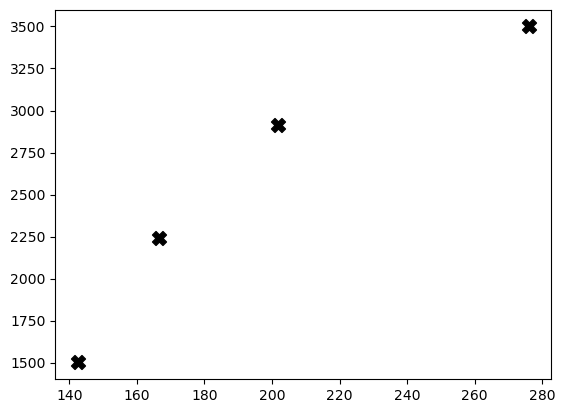

In [19]:
plt.scatter(centroid_X, centroid_Y, color="black", marker="X", s=100)
plt.show()

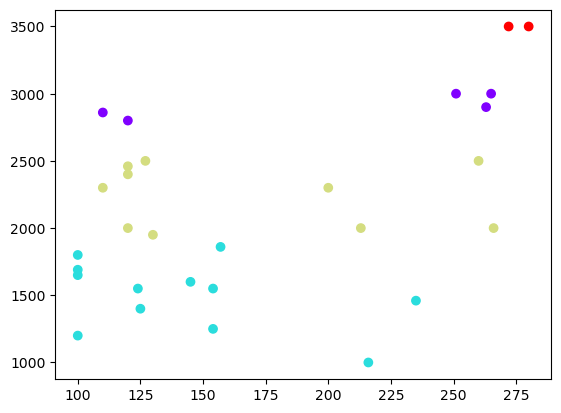

In [20]:
plt.scatter(X, Y, c=label, cmap="rainbow")
plt.show()

##### Titik cluster 4 terlihat lebih baik untuk menanggani kasus ini. Dengan demikian kita dapat menggunakan titik cluster 4 untuk kasus soal ini.